In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

import matplotlib
matplotlib.rcParams['font.size'] = 12

In [2]:
# データセット {x_n,y_n} (n=1...num) を用意
def create_dataset(num):
    dataset = DataFrame(columns=['x', 'y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x, y], index=['x', 'y']),
                                 ignore_index=True)
    return dataset

In [3]:
N=10            # サンプルを取得する位置 x の個数
train_set = create_dataset(N)
train_set

,x,y
0,0.000000,-0.244512
1,0.111111,0.767019
2,0.222222,0.943475
3,0.333333,1.308092
4,0.444444,0.289639
5,0.555556,-0.619923
6,0.666667,-1.070271
7,0.777778,-1.246205
8,0.888889,-0.730515
9,1.000000,0.492056


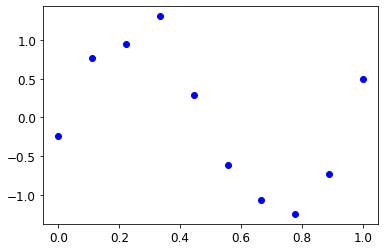

In [4]:
plt.scatter(train_set.x, train_set.y, marker='o', color='blue')

In [5]:
# 最小二乗法で解を求める
def resolve(dataset, m):
    print("[START] RESOLVE")
    t = dataset.y
    phi = DataFrame()
    for i in range(0, m+1):
        print("DS:")
        print(dataset)
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi, p], axis=1)
        print(phi)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y
    print("[END] RESOLVE")
    return f

In [6]:
def show_result(subplot, train_set, m):
    f = resolve(train_set, m)
    subplot.set_xlim(-0.05, 1.05)
    subplot.set_ylim(-1.5, 1.5)
    subplot.set_title("M=%d" % m, fontsize=10)

    # トレーニングセットを表示
    subplot.scatter(train_set.x, train_set.y, marker='o',
                    color='blue', label=None)

    # 真の曲線を表示
    linex = np.linspace(0, 1, 101)
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green', linestyle='--')

    # 多項式近似の曲線を表示
    linex = np.linspace(0, 1, 101)
    liney = f(linex)
    label = "E(RMS)=%.2f" % rms_error(train_set, f)
    subplot.plot(linex, liney, color='red', label=label)
    subplot.legend(loc=1, fontsize=10)

In [7]:
# 平方根平均二乗誤差（Root mean square error）を計算
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

[START] RESOLVE
DS:
          x         y
0  0.000000 -0.244512
1  0.111111  0.767019
2  0.222222  0.943475
3  0.333333  1.308092
4  0.444444  0.289639
5  0.555556 -0.619923
6  0.666667 -1.070271
7  0.777778 -1.246205
8  0.888889 -0.730515
9  1.000000  0.492056
   x**0
0   1.0
1   1.0
2   1.0
3   1.0
4   1.0
5   1.0
6   1.0
7   1.0
8   1.0
9   1.0
DS:
          x         y
0  0.000000 -0.244512
1  0.111111  0.767019
2  0.222222  0.943475
3  0.333333  1.308092
4  0.444444  0.289639
5  0.555556 -0.619923
6  0.666667 -1.070271
7  0.777778 -1.246205
8  0.888889 -0.730515
9  1.000000  0.492056
   x**0      x**1
0   1.0  0.000000
1   1.0  0.111111
2   1.0  0.222222
3   1.0  0.333333
4   1.0  0.444444
5   1.0  0.555556
6   1.0  0.666667
7   1.0  0.777778
8   1.0  0.888889
9   1.0  1.000000
DS:
          x         y
0  0.000000 -0.244512
1  0.111111  0.767019
2  0.222222  0.943475
3  0.333333  1.308092
4  0.444444  0.289639
5  0.555556 -0.619923
6  0.666667 -1.070271
7  0.777778 -1.246205
8  0

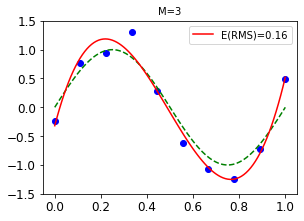

In [8]:
fig = plt.figure(figsize=(10, 7))
for i, m in enumerate([3]):
#for i, m in enumerate([0, 1, 3, 9]):
    subplot = fig.add_subplot(2, 2, i+1)
    show_result(subplot, train_set, m)

In [9]:
# トレーニングセットとテストセットでの誤差の変化を表示
def show_rms_trend(train_set, test_set):
    df = DataFrame(columns=['Training set', 'Test set'])
    for m in range(0,10):   # 多項式の次数
        f = resolve(train_set, m)
        train_error = rms_error(train_set, f)
        test_error = rms_error(test_set, f)
        df = df.append(
                Series([train_error, test_error],
                        index=['Training set','Test set']),
                        ignore_index=True)
    df.plot(title='RMS Error', style=['-','--'], grid=True,
            xticks=range(0, 10), figsize=(8, 5), ylim=(0, 0.9))

In [10]:
test_set = create_dataset(N)
test_set

,x,y
0,0.000000,-0.183115
1,0.111111,0.395854
2,0.222222,1.269642
3,0.333333,1.148444
4,0.444444,0.895165
5,0.555556,-0.301785
6,0.666667,-0.748014
7,0.777778,-1.017922
8,0.888889,-0.660015
9,1.000000,-0.184984


[START] RESOLVE
DS:
          x         y
0  0.000000 -0.244512
1  0.111111  0.767019
2  0.222222  0.943475
3  0.333333  1.308092
4  0.444444  0.289639
5  0.555556 -0.619923
6  0.666667 -1.070271
7  0.777778 -1.246205
8  0.888889 -0.730515
9  1.000000  0.492056
   x**0
0   1.0
1   1.0
2   1.0
3   1.0
4   1.0
5   1.0
6   1.0
7   1.0
8   1.0
9   1.0
[END] RESOLVE
[START] RESOLVE
DS:
          x         y
0  0.000000 -0.244512
1  0.111111  0.767019
2  0.222222  0.943475
3  0.333333  1.308092
4  0.444444  0.289639
5  0.555556 -0.619923
6  0.666667 -1.070271
7  0.777778 -1.246205
8  0.888889 -0.730515
9  1.000000  0.492056
   x**0
0   1.0
1   1.0
2   1.0
3   1.0
4   1.0
5   1.0
6   1.0
7   1.0
8   1.0
9   1.0
DS:
          x         y
0  0.000000 -0.244512
1  0.111111  0.767019
2  0.222222  0.943475
3  0.333333  1.308092
4  0.444444  0.289639
5  0.555556 -0.619923
6  0.666667 -1.070271
7  0.777778 -1.246205
8  0.888889 -0.730515
9  1.000000  0.492056
   x**0      x**1
0   1.0  0.000000
1   

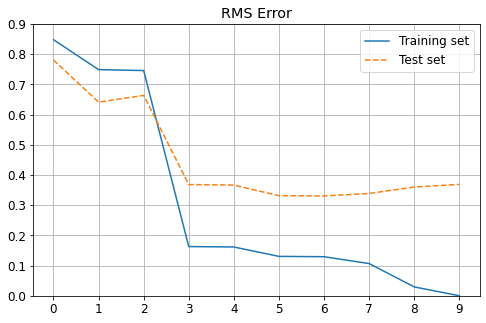

In [11]:
show_rms_trend(train_set, test_set)